In [1]:
import pandas as pd
import os
from scipy import misc
import matplotlib.pyplot as plt
import seaborn
import numpy as np

%matplotlib inline

In [2]:
%%time
dir_train = 'data/train'
train_df = pd.DataFrame(columns = ['category', 'image_name', 'width', 'height', 'type', 'target'])

for ind, folder in enumerate(os.listdir(dir_train)):
    if ind % 30 == 0:
        print('{}'.format(folder))
    folder = os.path.join(dir_train, folder)
    if os.path.isdir(folder):
        image_files = os.listdir(folder)
        for image_file in image_files:
            if not image_file.startswith('.'):
                image = misc.imread(os.path.join(folder, image_file))
                category = folder[15:]
                width = image.shape[0]
                height = image.shape[1]
                target = int(folder.split('.')[0].split('/')[2])
                train_df.loc[train_df.shape[0]]=[category, image_file, width, 
                                                 height, image.dtype, target]

.DS_Store
030.canoe
060.duck
090.gorilla
120.joy-stick
150.octopus
180.screwdriver
210.syringe
240.watch-101
CPU times: user 5min 25s, sys: 20 s, total: 5min 44s
Wall time: 5min 59s


In [3]:
train_df.to_csv('data/data_analys.csv')

### Classes distribution

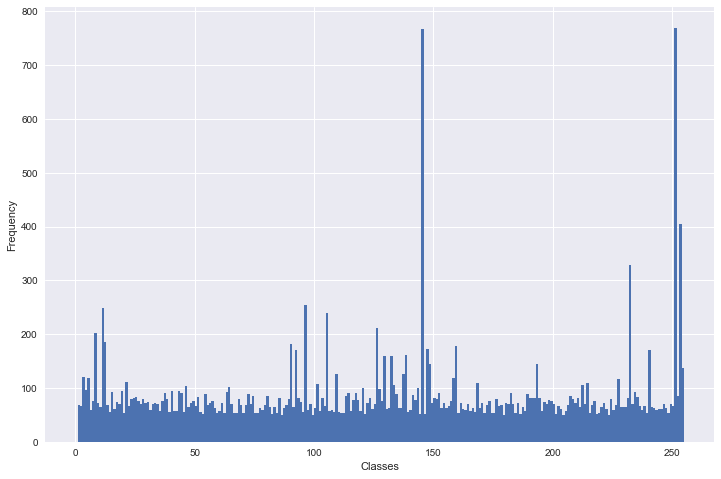

In [4]:
plt.figure(figsize=(12, 8))
plt.hist(train_df['target'], bins=range(len(train_df['target'].unique())))
plt.xlabel('Classes')
plt.ylabel('Frequency');